## lesson 2

### Pandas

    Скачайте любой табличный датасет (можете использовать тот же, что и в дз к занятию "Знакомство с библиотеками"), например, с https://www.kaggle.com/datasets
    Проведите поноценный EDA
        "погрузитесь" в данные
        составьте описание измерений из датасета
        очистите данные, если это необходимо
        попробуйте создать дополнительные переменные, которые могут помочь лучше понять данные


In [273]:
import pandas as pd
# данные взяты с https://www.kaggle.com/datasets/mdwaquarazam/stock-price-history-top-10-companies?resource=download
df = pd.read_csv('./Libraries/kaggle_data_stock_prices/ZAll_Combine_Stock_Histry.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,07-08-2017,39.264999,39.730000,39.167500,39.702499,37.585022,87481200,AAPL
1,08-08-2017,39.650002,40.457500,39.567501,40.020000,37.885582,144823600,AAPL
2,09-08-2017,39.814999,40.317501,39.777500,40.264999,38.117512,104526000,AAPL
3,10-08-2017,39.974998,40.000000,38.657501,38.830002,36.903397,163217200,AAPL
4,11-08-2017,39.150002,39.642502,39.017502,39.369999,37.416603,105028400,AAPL


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12580 entries, 0 to 12579
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12580 non-null  object 
 1   Open       12580 non-null  float64
 2   High       12580 non-null  float64
 3   Low        12580 non-null  float64
 4   Close      12580 non-null  float64
 5   Adj Close  12580 non-null  float64
 6   Volume     12580 non-null  int64  
 7   Company    12580 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 786.4+ KB


In [275]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12580.000000,12580.000000,12580.000000,12580.000000,12580.000000,1.258000e+04
mean,171.650511,174.152626,169.017963,171.651667,169.729752,3.977808e+07
std,160.986591,164.374458,157.251344,160.876030,161.483350,4.359162e+07
min,31.622499,32.494999,31.115000,31.770000,31.554657,1.144000e+06
25%,80.895001,81.603002,79.991875,80.970875,78.738447,9.803300e+06
50%,124.880001,126.271248,123.320000,124.979999,122.454689,2.466310e+07
75%,184.313126,186.727505,181.885002,184.715004,183.013229,5.338752e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,4.265100e+08


In [276]:
df.Date

0        07-08-2017
1        08-08-2017
2        09-08-2017
3        10-08-2017
4        11-08-2017
            ...    
12575    29-07-2022
12576    01-08-2022
12577    02-08-2022
12578    03-08-2022
12579    04-08-2022
Name: Date, Length: 12580, dtype: object

In [277]:
df['Year'] = df['Date'].apply(lambda x: x.split('-')[-1])
df['Month'] = df['Date'].apply(lambda x: x.split('-')[-2])

df[['Date','Year','Month']]

,Date,Year,Month
0,07-08-2017,2017,08
1,08-08-2017,2017,08
2,09-08-2017,2017,08
3,10-08-2017,2017,08
4,11-08-2017,2017,08
...,...,...,...
12575,29-07-2022,2022,07
12576,01-08-2022,2022,08
12577,02-08-2022,2022,08
12578,03-08-2022,2022,08


In [278]:
df[['Year','Month']] = df[['Year','Month']].astype('int')
df.drop('Date',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12580 entries, 0 to 12579
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       12580 non-null  float64
 1   High       12580 non-null  float64
 2   Low        12580 non-null  float64
 3   Close      12580 non-null  float64
 4   Adj Close  12580 non-null  float64
 5   Volume     12580 non-null  int64  
 6   Company    12580 non-null  object 
 7   Year       12580 non-null  int64  
 8   Month      12580 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 884.7+ KB


In [279]:
from matplotlib import pyplot as plt

df.groupby(['Year','Month']).mean()

Open        High         Low       Close   Adj Close  \
Year Month                                                               
2017 8       76.404163   77.060810   75.783199   76.423839   73.530166   
     9       78.254445   78.861750   77.572483   78.221488   75.335609   
     10      81.807311   82.511416   81.132490   81.896250   78.894159   
     11      84.936778   85.589419   84.142603   84.943343   81.835682   
     12      85.622482   86.311574   84.818767   85.540143   82.378678   
...                ...         ...         ...         ...         ...   
2022 4      277.674104  282.234864  270.745189  275.024222  274.707510   
     5      223.847924  228.905763  217.527695  223.523750  223.349115   
     6      212.873208  217.369795  208.775560  212.595203  212.489077   
     7      218.964190  223.748485  215.521872  220.807460  220.802460   
     8      246.337001  251.549002  243.747000  247.581251  247.581251   

                  Volume  
Year Month                
2017 8      3.399780e+07  
     9      3.755734e+07  
     10     3.334810e+07  
     11     3.574908e+07  
     12     3.307444e+07  
...                  ...  
2022 4      3.482423e+07  
     5      4.362808e+07  
     6      3.452795e+07  
     7      3.191132e+07  
     8      2.951901e+07  

[61 rows x 6 columns]

In [280]:
df_plot = df.groupby(['Year','Month'],as_index=False).mean()
df_plot['Year_Month'] = df_plot[['Year']].apply(lambda x: x).astype('str').values + '-' + df_plot[['Month']].apply(lambda x: x).astype('str').values

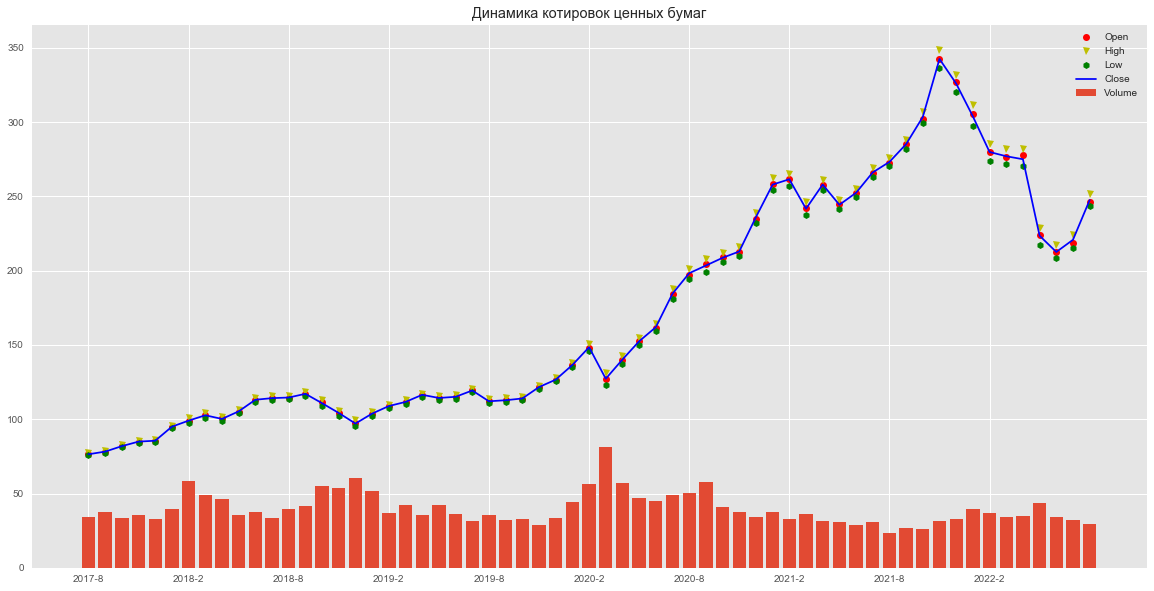

In [344]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(df_plot['Year_Month'],df_plot['Open'], 'o',c='r',label = 'Open')
plt.plot(df_plot['Year_Month'],df_plot['High'], 'v',c='y',label = 'High')
plt.plot(df_plot['Year_Month'],df_plot['Low'], 'h',c='green',label = 'Low')
plt.plot(df_plot['Year_Month'],df_plot['Close'], c='blue',label = 'Close')
plt.xticks(df_plot['Year_Month'].unique()[0:-1:6])
plt.bar(df_plot['Year_Month'],df_plot['Volume']/1000000,label = 'Volume')
plt.title('Динамика котировок ценных бумаг')
plt.legend()
plt.show()

*

1. Вычислите A + B, A - B
 
 $\\
A = \left(
\begin{array}{cccc}
1 & -2 & 4\\
2 & 0 & -1\\
\end{array}
\right), B = \left(
\begin{array}{cccc}
5 & 2 & 3\\
4 & 6 & 2\\
\end{array}
\right)$



2. Найдите матрицу С = A - 3B
 
 $\\
A = \left(
\begin{array}{cccc}
1 & 2 \\
2 & -1\\
3 & 0\\
\end{array}
\right), B = \left(
\begin{array}{cccc}
-1 & 1 \\
1 & 2\\
0 & 0\\
\end{array}
\right)$



3. Вычислите С = AB
 
 $\\
A = \left(
\begin{array}{cccc}
1 & -1 \\
2 & 0\\
3 & 0\\
\end{array}
\right), B = \left(
\begin{array}{cccc}
1 & 1 \\
2 & 0\\
\end{array}
\right)$



4. Вычислите определитель матрицы А
 
 $\\
A = \left(
\begin{array}{cccc}
6 & -1 & 4\\
2 & 1 & 10\\
8 & 0 & 2\\
\end{array}
\right)$



5. Вычислите матрицу, обратную матрице А. И покажите, что она действительно является обратной
 
 $\\
A = \left(
\begin{array}{cccc}
3 & 3 & -1\\
4 & 1 & 3\\
1 & -2 & -2\\
\end{array}
\right)$

In [355]:
# 1
from pprint import pprint

A = np.matrix(np.array([[1,-2,4],[2,0,-1]]))
B = np.matrix(np.array([[5,2,3],[4,6,2]]))
C = A+B
print('сумма A и B = ')
pprint(C)
C = A-B
print('\nразность A и B = ')
pprint(C)


сумма A и B = 
matrix([[6, 0, 7],
        [6, 6, 1]])

разность A и B = 
matrix([[-4, -4,  1],
        [-2, -6, -3]])


In [356]:
# 2

A = np.matrix(np.array([[1,2],[2,-1],[3,0]]))
B = np.matrix(np.array([[-1,1],[1,2],[0,0]]))
C = A-3*B
print('A-3*B = ')
pprint(C)


A-3*B = 
matrix([[ 4, -1],
        [-1, -7],
        [ 3,  0]])


In [360]:
# 3

A = np.matrix(np.array([[1,-1],[2,0],[3,0]]))
B = np.matrix(np.array([[1,1],[2,0]]))
C = np.dot(A,B)
print('A*B = ')
pprint(C)


A*B = 
matrix([[-1,  1],
        [ 2,  2],
        [ 3,  3]])


In [362]:
# 4

A = np.matrix(np.array([[6,-1,4],[2,1,10],[8,0,2]]))
C = round(np.linalg.det(A),2)
print('определитель = ')
pprint(C)


определитель = 
-96.0


In [366]:
# 3

A = np.matrix(np.array([[3,3,-1],[4,1,3],[1,-2,-2]]))
C = np.linalg.inv(A)
print('обратная матрица для A = ')
pprint(C)
A_C = np.round(np.dot(A,C),4)
print('если перемножить матрицу A и ее обратную матрицу, получим единичную матрицу:')
pprint(A_C)

обратная матрица для A = 
matrix([[ 0.07407407,  0.14814815,  0.18518519],
        [ 0.2037037 , -0.09259259, -0.24074074],
        [-0.16666667,  0.16666667, -0.16666667]])
если перемножить матрицу A и ее обратную матрицу, получим единичную матрицу:
array([[ 1., -0.,  0.],
       [ 0.,  1.,  0.],
       [-0.,  0.,  1.]])
